<a href="https://colab.research.google.com/github/SwamyYedla/Digital-Image-Processing/blob/main/Question4_DIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy matplotlib pillow scipy

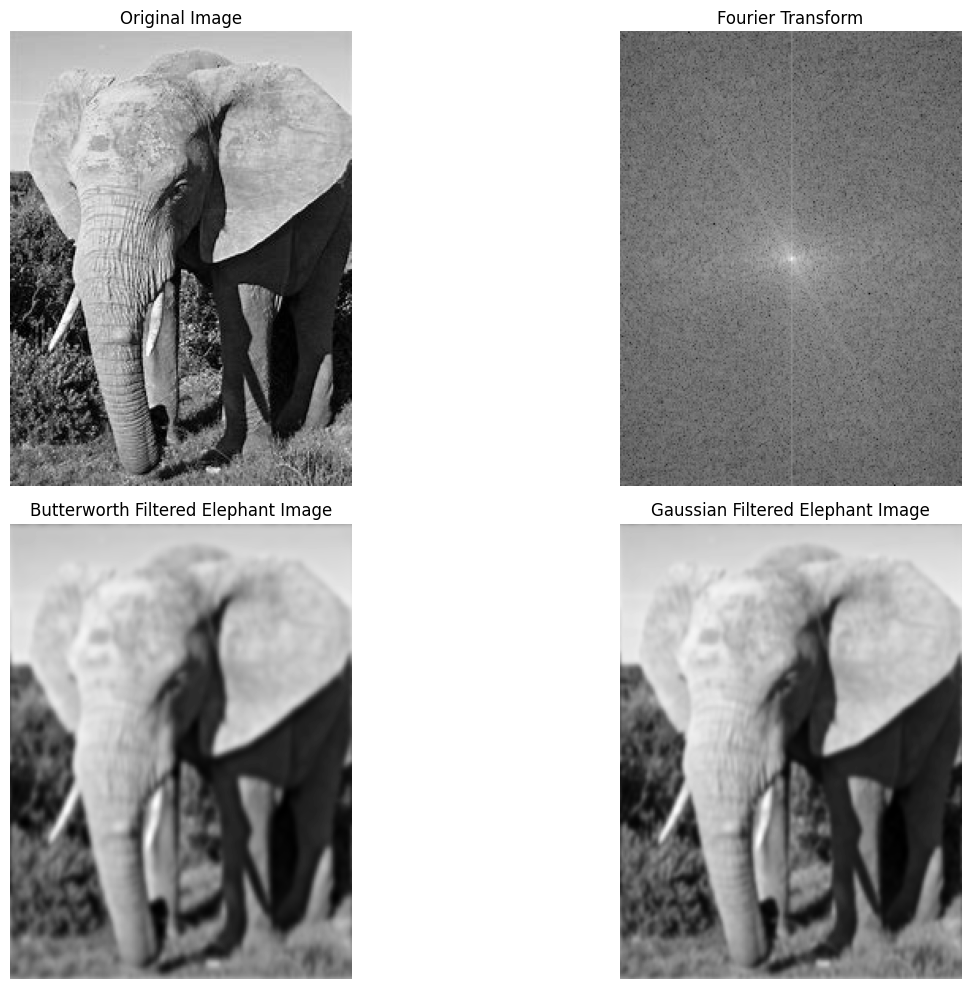

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fft import fft2, ifft2, fftshift, ifftshift

def load_image(image_path):
    image = Image.open(image_path).convert('L')
    return np.array(image, dtype=np.float32)

def apply_fourier_transform(image):
    f_transform = fft2(image)
    f_transform_shifted = fftshift(f_transform)
    return f_transform_shifted

def create_butterworth_filter(shape, cutoff, order):
    """that smooths out high-frequency noise based on a specified cutoff frequency and order"""
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    distance = np.sqrt((x - crow)**2 + (y - ccol)**2)
    butterworth_filter = 1 / (1 + (distance / cutoff)**(2 * order))
    return butterworth_filter

def create_gaussian_filter(shape, cutoff):
    """Create a Gaussian low-pass filter to determine the weight of frequencies, also defined by a cutoff.."""
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    distance = np.sqrt((x - crow)**2 + (y - ccol)**2)
    gaussian_filter = np.exp(-(distance**2) / (2 * (cutoff**2)))
    return gaussian_filter

def apply_filter(f_transform, filter_mask):
    return f_transform * filter_mask

def inverse_fourier_transform(f_transform_shifted):
    f_ishifted = ifftshift(f_transform_shifted)
    image_reconstructed = ifft2(f_ishifted)
    return np.abs(image_reconstructed)

# Load the image
image_path = 'Elephant.jpeg'
image = load_image(image_path)

# Apply Fourier Transform
f_transform_shifted = apply_fourier_transform(image)

# Create filters
butterworth_filter = create_butterworth_filter(image.shape, cutoff=30, order=2)
gaussian_filter = create_gaussian_filter(image.shape, cutoff=30)

# Apply filters
butterworth_filtered = apply_filter(f_transform_shifted, butterworth_filter)
gaussian_filtered = apply_filter(f_transform_shifted, gaussian_filter)

# Inverse Fourier Transform
image_butterworth = inverse_fourier_transform(butterworth_filtered)
image_gaussian = inverse_fourier_transform(gaussian_filtered)

# Display results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(np.log1p(np.abs(f_transform_shifted)), cmap='gray')
plt.title('Fourier Transform')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(image_butterworth, cmap='gray')
plt.title('Butterworth Filtered Elephant Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(image_gaussian, cmap='gray')
plt.title('Gaussian Filtered Elephant Image')
plt.axis('off')

plt.tight_layout()
plt.show()
